#**PATECH**

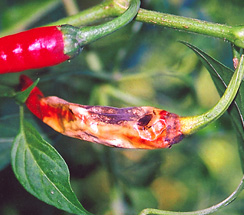

***Antracnose Disease on Chili***

PATECH is an Anthracnose Disease Monitoring and Alerting System for Chili Farmers. Severe cases of Anthracnose disease may lead to a production loss of up to 50%-75% every year. PATECH system gives farmers early alarm when the farm condition is suitable for anthracnose disease to grow so farmers can do an action to prevent the spread of infection. These devices are IoT-based with machine learning for data processing. PATECH is integrated with an android app on farmer’s phones.

*Product Implementations:*
*   https://xlfl.x-camp.id/product/patech

*Main Reference:*
*   https://www.canr.msu.edu/news/use_anthracnose_fruit_rot_prediction_model_to_assess_risk_of_infection
*   https://drive.google.com/file/d/10lWkCFoaAABhLojfsTur755J2Kbht79g/view?usp=sharing

*Dataset:*
*   https://enviroweather.msu.edu/weathermodels/weathersummary?selectedDate=2016-06-22&selectedStation=msu&run=1



#**RETRIEVING DATA**

In [ ]:
#import desired packages
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

In [ ]:
#import data
url = 'https://raw.githubusercontent.com/auliyaf/Patech/main/DatasetPatech.csv'
df1 = pd.read_csv(url)

In [ ]:
df1.head()

,WetPeriod,Station,Start of Wetting Period,End of Wetting Period,Duration (Hrs.),Avg. Temp(F),Rainfall (in.),Anthracnose risk,Wet hrs @ avg temp required for infection,Progress toward infection
0,1,East Lansing (MSUHort),1/5/2016 7:55,1/5/2016 8:25,0.6,10.6,0.00,None,0.0,0%
1,2,East Lansing (MSUHort),1/8/2016 12:45,1/10/2016 10:55,46.3,38.0,0.66,None,0.0,74%
2,3,East Lansing (MSUHort),1/14/2016 12:00,1/14/2016 14:40,2.8,32.0,0.02,None,0.0,0%
3,4,East Lansing (MSUHort),1/15/2016 2:45,1/15/2016 3:50,1.2,38.7,0.00,None,0.0,0%
4,5,East Lansing (MSUHort),1/15/2016 15:40,1/16/2016 2:45,11.2,36.0,0.05,None,0.0,1%


In [ ]:
df1["Anthracnose risk"].value_counts()

None        1253
Low           95
Moderate      29
High           9
Name: Anthracnose risk, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


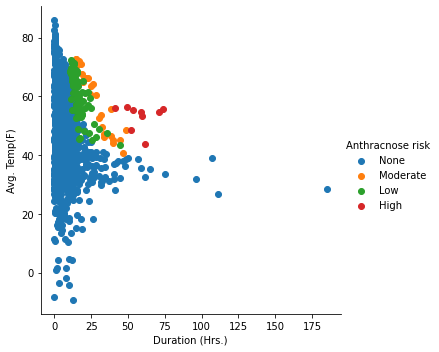

In [ ]:
sns.FacetGrid(df1, hue="Anthracnose risk", size=5) \
   .map(plt.scatter, "Duration (Hrs.)", "Avg. Temp(F)") \
   .add_legend()

It can be shown form the graph that our dataset are imbalanced. None data are dominated in dataset and can affect training process to be overfitting. So we clean and resample the data on excel (for efficiency) and convert the data to csv file as below:

In [ ]:
#import data
url2 = 'https://raw.githubusercontent.com/auliyaf/Patech/main/CELCIUS%20ORDERED%20222.csv'
df = pd.read_csv(url2)

In [ ]:
df.head()

,DurationHrs,AvgTempC,AnthracnoseRisk
0,71.2,12.6,High
1,61.8,6.6,High
2,52.3,9.1,High
3,59.3,11.9,High
4,74.0,13.2,High


We drop the unused columns, and only use rain duration per hours (raindrop sensors) and average temperature in Celcius (for temperature sensors)

In [ ]:
df["AnthracnoseRisk"].value_counts()

None        42
Low         40
Moderate    40
High        35
Name: AnthracnoseRisk, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


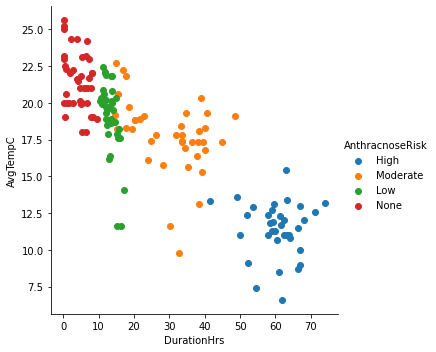

In [ ]:
sns.FacetGrid(df, hue="AnthracnoseRisk", size=5) \
   .map(plt.scatter, "DurationHrs", "AvgTempC") \
   .add_legend()

#**EDA**

In [ ]:
# total row and columns
df.shape

(157, 3)

*   Dataset comprises of 157 observations with 10 columns








In [ ]:
# print index dtype and column dtypes, non-null values and memory usage.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   DurationHrs      157 non-null    float64
 1   AvgTempC         157 non-null    float64
 2   AnthracnoseRisk  157 non-null    object 
dtypes: float64(2), object(1)
memory usage: 3.8+ KB


In [ ]:
# statistics summary
df.describe()

,DurationHrs,AvgTempC
count,157.000000,157.000000
mean,25.585987,17.687261
std,21.822182,4.234606
min,0.100000,6.600000
25%,8.100000,14.100000
50%,15.200000,18.800000
75%,40.100000,20.600000
max,74.000000,25.600000


In [ ]:
df["AnthracnoseRisk"].value_counts()

None        42
Low         40
Moderate    40
High        35
Name: AnthracnoseRisk, dtype: int64

#**Data Modelling**

In [ ]:
#shuffle the data
df=df.iloc[np.random.permutation(len(df))]
df=df.reset_index(drop=True)

X = df.iloc[:,:2].values
y = df.iloc[:, [2]].values

le = LabelEncoder()
y = le.fit_transform(y)
y=to_categorical(y)

from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

model = Sequential()

model.add(Dense(64.0, activation='relu', input_shape=[2]))
model.add(Dense(64.0))
model.add(Dense(4.0, activation='softmax'))

model.compile(optimizer='sgd', loss='binary_crossentropy', metrics=['acc'])

hist = model.fit(X, y, epochs=30)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Epoch 1/30
5/5 [==============================] - 1s 3ms/step - loss: 0.7410 - acc: 0.5541
Epoch 2/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3683 - acc: 0.7452
Epoch 3/30
5/5 [==============================] - 0s 3ms/step - loss: 0.3101 - acc: 0.8025
Epoch 4/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2832 - acc: 0.8854
Epoch 5/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2897 - acc: 0.8025
Epoch 6/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2684 - acc: 0.8535
Epoch 7/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2428 - acc: 0.8662
Epoch 8/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2336 - acc: 0.8790
Epoch 9/30
5/5 [==============================] - 0s 3ms/step - loss: 0.2277 - acc: 0.8854
Epoch 10/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2201 - acc: 0.8790
Epoch 11/30
5/5 [==============================] - 0s 2ms/step - loss: 0.2469 - acc: 0.80

In [ ]:
y

array([[1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],


#**Covert to TensorFlow Lite**

In [ ]:
from tensorflow import lite
converter = lite.TFLiteConverter.from_keras_model(model)
tfmodel = converter.convert()
open('patechModel.tflite','wb').write(tfmodel)
# Download the digit classification model
from google.colab import files
files.download('patechModel.tflite')


INFO:tensorflow:Assets written to: /tmp/tmpoq6ylpsf/assets


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.mean(hist.history['acc'])

0.8740976750850677

In [ ]:
interpreter = tf.lite.Interpreter(model_path="patechModel.tflite")
interpreter.allocate_tensors()

In [ ]:
# Print input shape and type
inputs = interpreter.get_input_details()
print('{} input(s):'.format(len(inputs)))
for i in range(0, len(inputs)):
    print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

1 input(s):
[1 2] <class 'numpy.float32'>


In [ ]:
# Print output shape and type
outputs = interpreter.get_output_details()
print('\n{} output(s):'.format(len(outputs)))
for i in range(0, len(outputs)):
    print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))


1 output(s):
[1 4] <class 'numpy.float32'>


In [ ]:
class_names = ['High', 'Low', 'Medium','None']

In [ ]:
predict_dataset = tf.convert_to_tensor([
    [0,22.7 ],
    [2, 30.9],
    [3,36.8],
    [29,27.7],
    [55,28.3],
    [78,26.6],
    [1,25.1],
    [16,26.1],
    [43,21.1],
    [5,25],
    [3,32.9],
    [3,25],
    [6,29.5],
    [31,21.3],
    [0,21.2],
    [5,26.9],
    [1,25.2],
    [10,24.3],
    [7,26.2],
    [31,21.4],
    [0,21.8],
    [0,21]
])
predictions = model(predict_dataset, training=False)

for i, logits in enumerate(predictions):
  class_idx = tf.argmax(logits).numpy()
  p = tf.nn.softmax(logits)[class_idx]
  name = class_names[class_idx]
  print("Example {} prediction: {} ({:4.1f}%)".format(i, name, 100*p))

Example 0 prediction: None (47.5%)
Example 1 prediction: None (47.5%)
Example 2 prediction: None (47.5%)
Example 3 prediction: Medium (35.4%)
Example 4 prediction: Medium (47.5%)
Example 5 prediction: Medium (33.6%)
Example 6 prediction: None (47.5%)
Example 7 prediction: Low (44.8%)
Example 8 prediction: Medium (47.2%)
Example 9 prediction: None (47.4%)
Example 10 prediction: None (47.5%)
Example 11 prediction: None (47.5%)
Example 12 prediction: None (47.5%)
Example 13 prediction: Medium (45.9%)
Example 14 prediction: None (47.5%)
Example 15 prediction: None (47.5%)
Example 16 prediction: None (47.5%)
Example 17 prediction: None (39.2%)
Example 18 prediction: None (47.2%)
Example 19 prediction: Medium (45.9%)
Example 20 prediction: None (47.5%)
Example 21 prediction: None (47.5%)
